In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("q_study_2020-10-01_four_A_classes.csv")

[Text(0, 0.5, 'average final infected ratio'), Text(0.5, 0, 'q rate')]

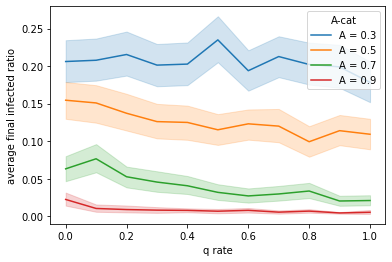

In [3]:
data["A-cat"] = data["A"].apply(lambda x: f"A = {x}")


splot = sns.lineplot(x='q', y='infected_ratio', hue="A-cat", data=data)

splot.set(#xscale="log",
          xlabel='q rate',
          ylabel='average final infected ratio')

In [4]:
#data.to_csv("q_study_2020-10-01.csv")

Two research questions from 2020/09/25:

1. For a given fraction of traced links/total links, how does the final infection rate depend on the prevalence of “distant” links?  There are various ways to get at this question, some of which would involve revamping the simulation.  Erez was suggesting a simulation that would fix the number of traced links and vary the number of distant traced links.  As I understand it, the graph you showed was of final infection rate (y axis) v. ratio of (distant traced links)/(total traced links) – or maybe it was close traced links/total traced links.  Either way, the issue with that sort of graph is that it mixes data from different values of traced links/total links, which could make trends hard to identify.  But I think alternatively you could use the data you have to make a scatter plot with color representing infection rate (essentially a heat map).

Total number of edges is $NK/2$
Total number of traced edges is $T_e$.

Fraction of traced links is $T_e / (NK / 2)$.

The prevalence of "distant" edges, over all edges, is approximately $p$.


2. Compare infection rates for different choices of (A, q) that have the same values of traced links/total links and distant links/traced links. This gets at whether it matters if we remove distant edges by failure to adopt or remove them  by leaving the phone at home.

The proportion of traced links will be, on average, 

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,time,A,W,C,beta_hat,alpha,gamma,zeta,...,N,K,p,s_final,route_adjacent_ratio,traced_edges,traced_edges_distant,case,infected_ratio,A-cat
0,0,0,14,0.3,0.5,NaN,0.4,0.25,0.1,0.1,...,2000,4,0.256,1993,0.333333,269,0,q-0.000,0.0035,A = 0.3
1,1,1,247,0.3,0.5,NaN,0.4,0.25,0.1,0.1,...,2000,4,0.256,1366,0.672986,299,0,q-0.000,0.3170,A = 0.3
2,2,2,218,0.3,0.5,NaN,0.4,0.25,0.1,0.1,...,2000,4,0.256,926,0.681267,280,0,q-0.000,0.5370,A = 0.3
3,3,3,2,0.3,0.5,NaN,0.4,0.25,0.1,0.1,...,2000,4,0.256,1998,1.000000,269,0,q-0.000,0.0010,A = 0.3
4,4,4,8,0.3,0.5,NaN,0.4,0.25,0.1,0.1,...,2000,4,0.256,1995,1.000000,269,0,q-0.000,0.0025,A = 0.3


In [6]:
data['traced_edges_close'] = data['traced_edges'] - data['traced_edges_distant']
data['traced_edges_ratio'] = data['traced_edges'] / (data['N'] * data['K'] / 2)
data['traced_edges_distant_ratio'] = data['traced_edges_distant'] / data['traced_edges']

(array([5.100e+01, 4.440e+02, 1.051e+03, 1.075e+03, 8.250e+02, 3.250e+02,
        7.300e+01, 6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.200e+01, 6.200e+01, 1.710e+02, 2.890e+02,
        3.560e+02, 3.510e+02, 3.910e+02, 3.300e+02, 3.770e+02, 3.360e+02,
        2.900e+02, 1.880e+02, 9.400e+01, 3.800e+01, 1.200e+01, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        4.000e+00, 3.200e+01, 5.400e+01, 8.200e+01, 1.100e+02, 1.170e+02,
        1.140e+02, 1.520e+02, 1.090e+02, 1.440e+02, 1.180e+02, 1.350e+02,
        1.170e+02, 1.210e+02, 1.250e+02, 1.320e+02, 1.100e+02, 1.220e+02,
        1.070e+02, 6.200e+01, 7.400e+01, 3.500e+01, 1.700e+01, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.300e+01, 2.300e+01, 3.700e+01, 2.900e+01, 2.800e+01,
        4.300e+01, 2.700e+01, 4.300e+01, 3.200e+01, 4.100e+01, 4.400e+01,
        3.900e+01, 3.500e+01, 3.700e+0

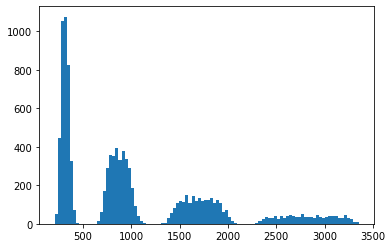

In [7]:
plt.hist(data['traced_edges'], bins = 100)

In [8]:
data['infected_ratio'].head()

0    0.0035
1    0.3170
2    0.5370
3    0.0010
4    0.0025
Name: infected_ratio, dtype: float64

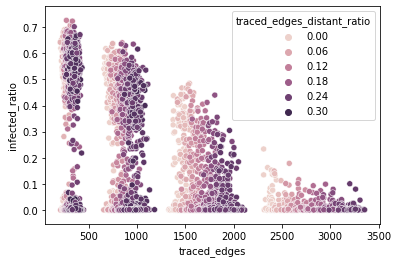

In [9]:
#data['log_infected_ratio'] = np.log1p(data['infected_ratio'])

g = sns.scatterplot(
    data = data,
    y = 'infected_ratio',
    x = 'traced_edges',
    hue = 'traced_edges_distant_ratio'
)
#g.set_yscale('log')

* distant untraced links/total links = $p(1-q)A^2$
* distant traced links/total links = $(1-pq)A^2$
* traced links/total links = (1-p(1-q))A^2 

Let T = (traced links/total links) = $A^2 ((1 - p) + pq)$

Let D = (distant traced links)/(total traced links) = $(pq)/((1 - p) +pq)$

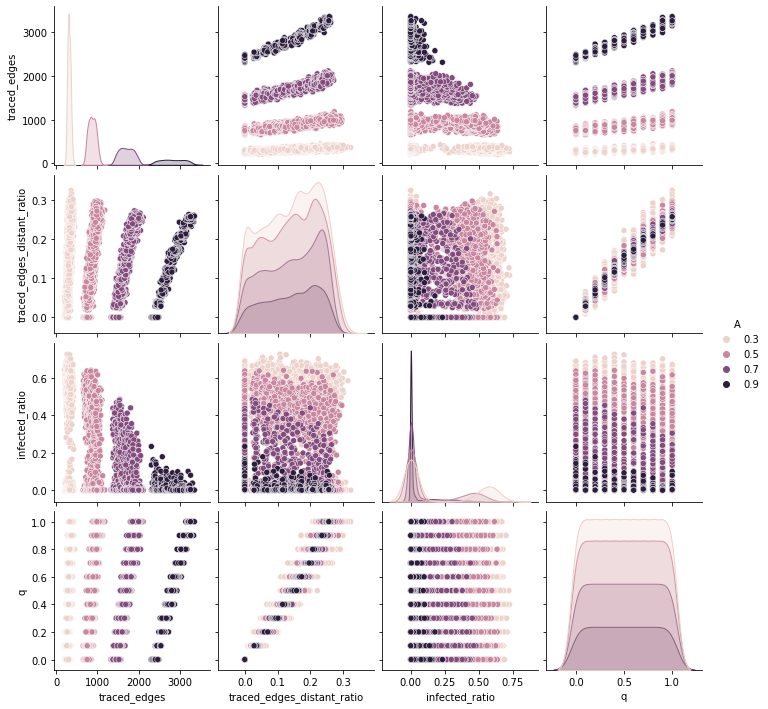

In [10]:
sns.pairplot(
    data[[
        'traced_edges',
        'traced_edges_distant_ratio',
        'infected_ratio',
        'q',
        'A']
    ],
    hue='A')

In [11]:
data['D'] = (data['p'] * data['q']) / ((1 - data['p']) + data['p'] * data['q'])

In [12]:
data['T'] = ((1 - data['p']) + data['p'] * data['q']) * data['A'] ** 2

In [13]:
data['DT'] = data['D'] * data['T']

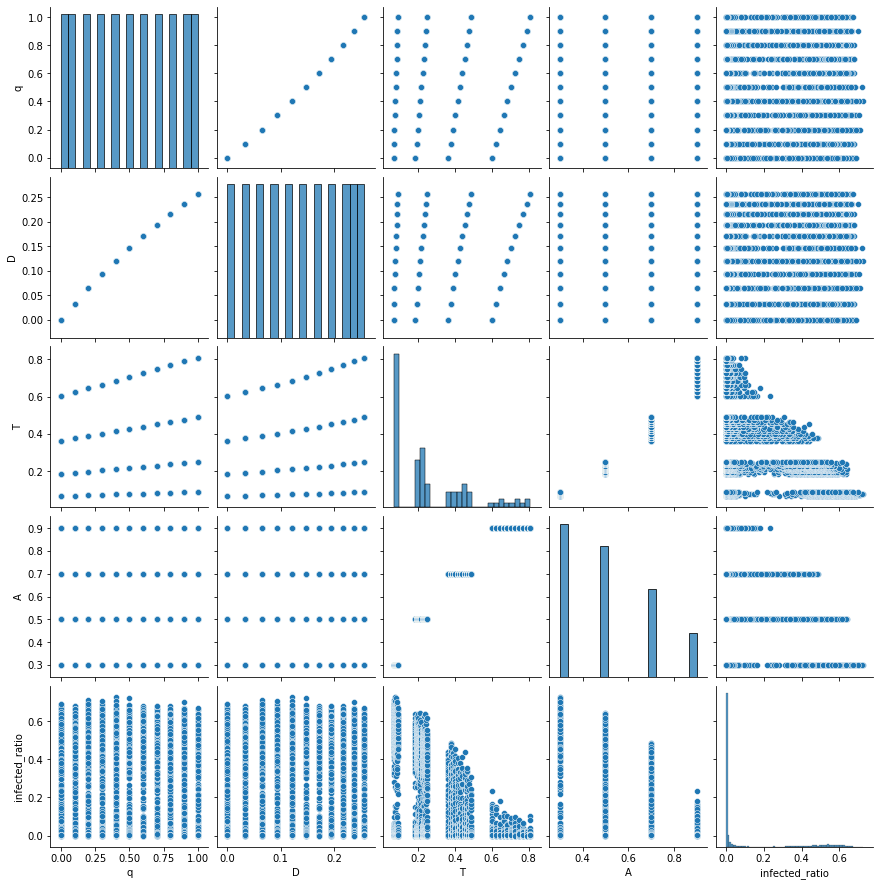

In [14]:
sns.pairplot(data[['q','D','T','A', 'infected_ratio']])

[Text(0, 0.5, 'average final infected ratio'),
 Text(0.5, 0, 'T - traced edges')]

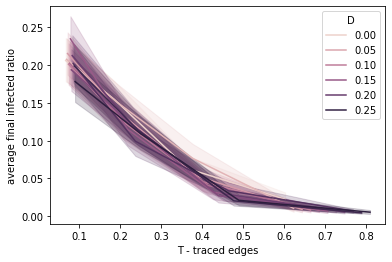

In [15]:
data["D-cat"] = data["D"].apply(lambda x: f"D = {round(x,2)}")


splot = sns.lineplot(
    x='T',
    y='infected_ratio',
    data=data,
    hue = 'D'
)

splot.set(#xscale="log",
          xlabel='T - traced edges',
          ylabel='average final infected ratio')

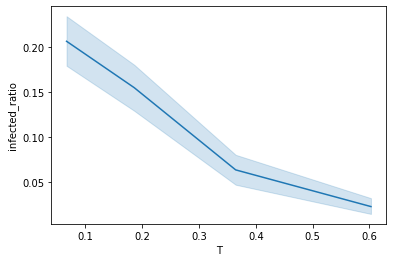

In [16]:


sns.lineplot(x='T', y='infected_ratio',data=data[data['D'] == 0])

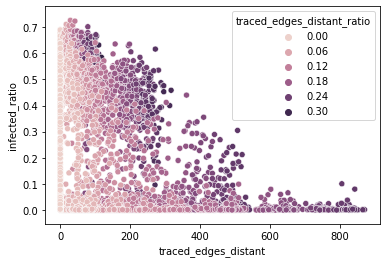

In [17]:
g = sns.scatterplot(
    data = data,
    y = 'infected_ratio',
    x = 'traced_edges_distant',
    hue = 'traced_edges_distant_ratio'
)

#g.set_yscale('log')

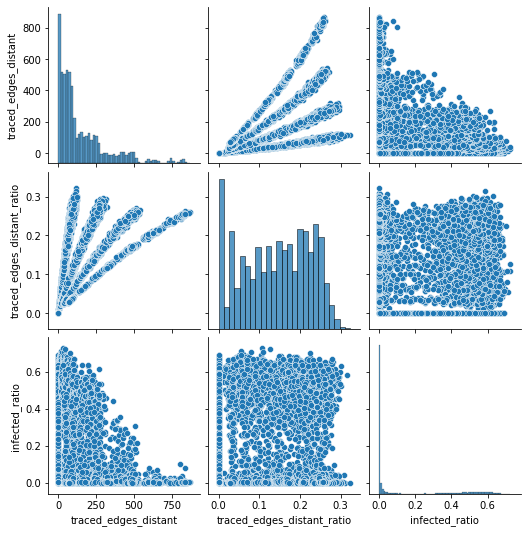

In [18]:
sns.pairplot(
    data[['traced_edges_distant',
          'traced_edges_distant_ratio',
          'infected_ratio']])

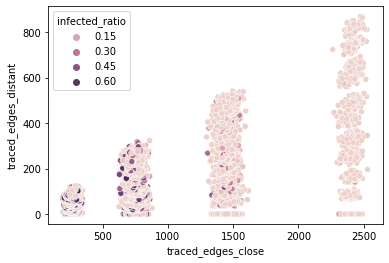

In [19]:
g = sns.scatterplot(
    data = data,
    hue = 'infected_ratio',
    x = 'traced_edges_close',
    y = 'traced_edges_distant'
)


Notionally:

$$I(t_c, t_d) $$

$$D = t_d / (t_c + t_d)$$

$$T = t_c + t_d$$

Values of interest:

$$\frac{dI}{dt_d}(t_c, t_d)$$

$$\frac{dI}{dt_c}(t_c, t_d)$$

We are interested in cases where

$$A_1^2 * p = A_2^2$$

$$A_1 = \sqrt{\frac{A_2^2}{p}}$$


Two questions:
 - Suppose we talk two systems in which we are tracing the same number of edges. And look effect of marginal changing of these edges from close to distant edges.
 - What if different systems with same number of short and distant edges. But we got there the same way: varying A, and varying q. Does the infected ratio depend on the A and q, conditional on short and distant traced edges.
 
Propensity score matching?

Idea: try to fit a few functions to the data and see what's up.

In [20]:
import sys

sys.path.append('.')

import model

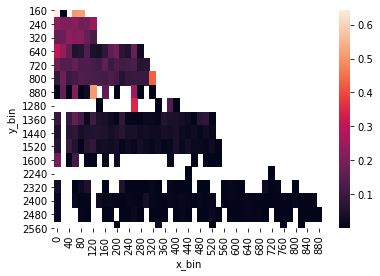

In [48]:
g, xyz, db = model.binned_heatmap(
    data,
    x = 'traced_edges_distant',
    x_base = 20,
    y = 'traced_edges_close',
    y_base = 80,
    z = 'infected_ratio'
)

In [63]:
xyz.shape

(56, 14)

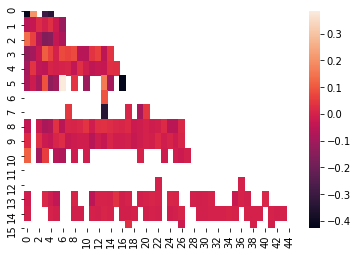

In [56]:
## heatmap flips x and y! so confusing...

xyz_np = xyz.to_numpy()

dx = xyz_np[1:,:] - xyz_np[:-1,:] 

sns.heatmap(dx)

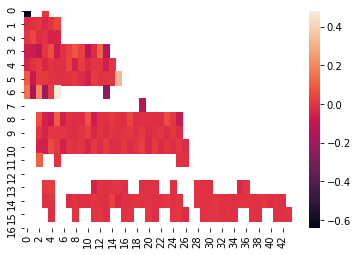

In [57]:
xyz_np = xyz.to_numpy()

dy = xyz_np[:,1:] - xyz_np[:,:-1] 

sns.heatmap(dy)

/home/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


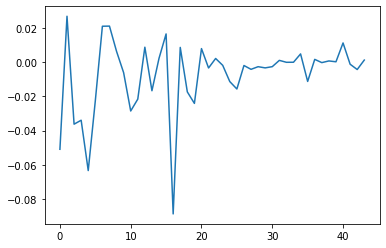

In [58]:
plt.plot(np.nanmean(dx, axis = 0))

/home/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


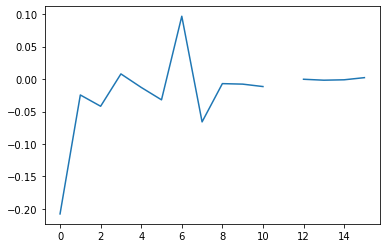

In [59]:
plt.plot(np.nanmean(dx, axis = 1))

/home/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


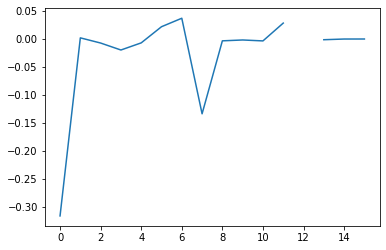

In [60]:
plt.plot(np.nanmean(dy, axis = 1))

/home/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


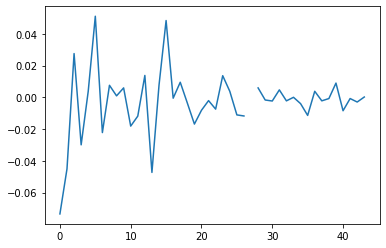

In [61]:
plt.plot(np.nanmean(dy, axis = 0))

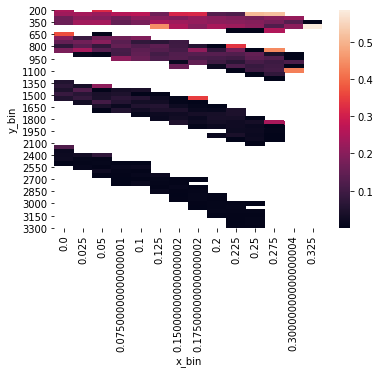

In [62]:
#lilies = data.copy()

#e_base = 50
#r_base = 0.025
#
#lilies['T_ish'] = lilies['traced_edges'].apply(lambda x : e_base * round(float(x) / e_base))
#lilies['D_ish'] = lilies['traced_edges_distant_ratio'].apply(lambda x : r_base * round(float(x) / r_base))

#lilies = lilies.groupby(['T_ish','D_ish'])['infected_ratio'].mean().reset_index()

#g = sns.heatmap(
#    lilies.pivot('T_ish','D_ish','infected_ratio')
#)

g, xyz, db = model.binned_heatmap(
    data,
    x = 'traced_edges_distant_ratio',
    x_base = 0.025,
    y = 'traced_edges',
    y_base = 50,
    z = 'infected_ratio'
)

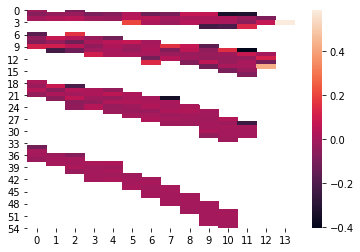

In [32]:
xyz_np = xyz.to_numpy()

dx = xyz_np[1:,:] - xyz_np[:-1,:] 

sns.heatmap(dx)

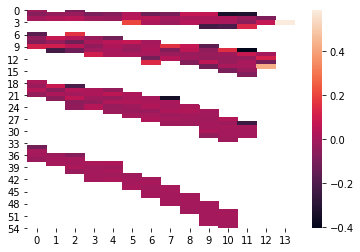

In [33]:
xyz_np = xyz.to_numpy()

dy = xyz_np[:,1:] - xyz_np[:,:-1] 

sns.heatmap(dx)